In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'train/'
img_width, img_height = 64, 64 

# Function to filter out .DS_Store files
def list_valid_filenames(directory):
    return [file for file in os.listdir(directory) if not file.startswith('.')]

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical',
    subset='training',
    shuffle=True,
    classes=list_valid_filenames(data_dir),
)

test_datagenerator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    classes=list_valid_filenames(data_dir),
)

Found 6121 images belonging to 53 classes.
Found 1503 images belonging to 53 classes.


In [2]:
sample_data, sample_labels = next(iter(train_datagenerator))
print(f"Sample data shape: {sample_data.shape}")
print(f"Sample labels shape: {sample_labels.shape}")

Sample data shape: (32, 64, 64, 3)
Sample labels shape: (32, 53)


In [3]:
train_datagenerator.class_indices

{'three of hearts': 0,
 'six of spades': 1,
 'ace of spades': 2,
 'ten of diamonds': 3,
 'nine of hearts': 4,
 'queen of clubs': 5,
 'seven of spades': 6,
 'six of clubs': 7,
 'eight of spades': 8,
 'jack of clubs': 9,
 'jack of diamonds': 10,
 'three of diamonds': 11,
 'ten of hearts': 12,
 'five of diamonds': 13,
 'nine of clubs': 14,
 'five of hearts': 15,
 'nine of diamonds': 16,
 'queen of spades': 17,
 'jack of spades': 18,
 'queen of diamonds': 19,
 'ace of clubs': 20,
 'six of diamonds': 21,
 'eight of diamonds': 22,
 'two of spades': 23,
 'king of hearts': 24,
 'four of hearts': 25,
 'four of clubs': 26,
 'five of spades': 27,
 'queen of hearts': 28,
 'seven of clubs': 29,
 'ten of spades': 30,
 'three of clubs': 31,
 'ten of clubs': 32,
 'eight of clubs': 33,
 'king of spades': 34,
 'four of spades': 35,
 'jack of hearts': 36,
 'two of hearts': 37,
 'six of hearts': 38,
 'ace of hearts': 39,
 'joker': 40,
 'king of clubs': 41,
 'seven of diamonds': 42,
 'nine of spades': 43,


In [4]:
train_datagenerator.class_indices.keys()

dict_keys(['three of hearts', 'six of spades', 'ace of spades', 'ten of diamonds', 'nine of hearts', 'queen of clubs', 'seven of spades', 'six of clubs', 'eight of spades', 'jack of clubs', 'jack of diamonds', 'three of diamonds', 'ten of hearts', 'five of diamonds', 'nine of clubs', 'five of hearts', 'nine of diamonds', 'queen of spades', 'jack of spades', 'queen of diamonds', 'ace of clubs', 'six of diamonds', 'eight of diamonds', 'two of spades', 'king of hearts', 'four of hearts', 'four of clubs', 'five of spades', 'queen of hearts', 'seven of clubs', 'ten of spades', 'three of clubs', 'ten of clubs', 'eight of clubs', 'king of spades', 'four of spades', 'jack of hearts', 'two of hearts', 'six of hearts', 'ace of hearts', 'joker', 'king of clubs', 'seven of diamonds', 'nine of spades', 'two of diamonds', 'three of spades', 'eight of hearts', 'seven of hearts', 'ace of diamonds', 'four of diamonds', 'five of clubs', 'king of diamonds', 'two of clubs'])

In [5]:
dir(train_datagenerator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 '_warn_if_super_not_called',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'max_queue_size',
 'n',
 'num_classes',
 'on_epoch_end',
 'reset',
 '

## we will follow an approach where we are going to train the model with train_dir and test the results afterwards with the test_dir.
    !! we will split the training data since our test data is only 250 images where we need approximately 1500 images since we have 7500 images.

Pixel value range: 0.0 to 1.0


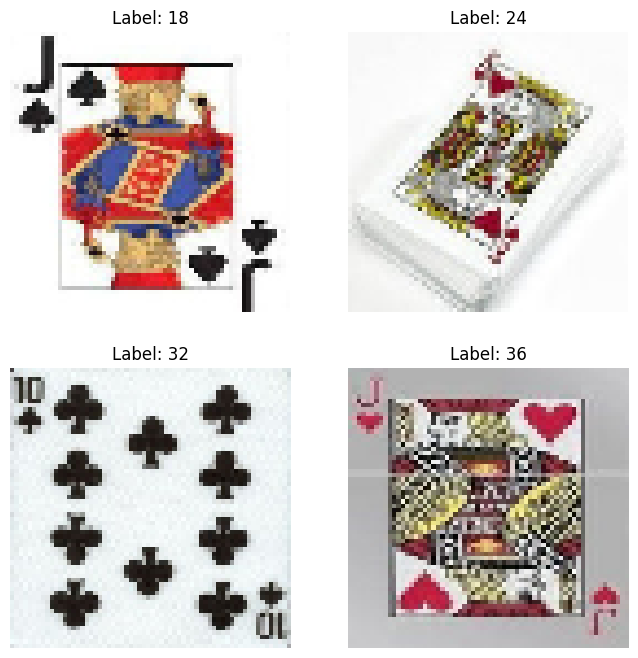

In [6]:
import numpy as np
import matplotlib.pyplot as plt

batch_size = 4
train_images, train_labels = next(train_datagenerator)

print("Pixel value range:", np.min(train_images), "to", np.max(train_images))

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(f"Label: {np.argmax(train_labels[i])}")
plt.show()

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

for layer in base_model.layers[-25:]:
    layer.trainable = True

inputs = base_model.input


x = Dense(64, activation='relu', kernel_regularizer=l2(0.00009))(base_model.output)  
x = BatchNormalization()(x)
x = Dropout(0.3)(x)  

x = Dense(256, activation='relu', kernel_regularizer=l2(0.00009))(x) 
x = BatchNormalization()(x)
x = Dropout(0.3)(x)  

x = Dense(128, activation='relu', kernel_regularizer=l2(0.00009))(x)  
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  

outputs = Dense(53, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.00006)  
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tensor_board = TensorBoard(log_dir='logs')

history = model.fit(train_datagenerator, 
                    validation_data=test_datagenerator, 
                    epochs=100, 
                    batch_size=16, 
                    callbacks=[tensor_board])


/var/folders/_m/cs7m68pn1kb5q__z748kqz700000gn/T/ipykernel_83714/3877107277.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.0165 - loss: 5.1344 - val_accuracy: 0.0226 - val_loss: 4.1782
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.0240 - loss: 4.8565 - val_accuracy: 0.0206 - val_loss: 4.2155
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.0261 - loss: 4.7325 - val_accuracy: 0.0353 - val_loss: 4.0686
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.0368 - loss: 4.5617 - val_accuracy: 0.0479 - val_loss: 4.0122
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.0486 - loss: 4.2982 - val_accuracy: 0.0931 - val_loss: 3.7323
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.0600 - loss: 4.1703 - val_accuracy: 0.1264 - val_loss: 3.4695
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.0749 - loss: 3.9731 - val_accuracy: 0.1730 - val_loss: 3.2211
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.0902 - loss: 3.857

Increase L2: When overfitting is observed.
Decrease L2: When underfitting is observed.
Monitor performance after each adjustment to find the best balance for your specific dataset.

Increase Learning Rate: When training is slow and loss decreases very little.
Decrease Learning Rate: When loss fluctuates or plateaus, indicating possible overshooting.
Adjust gradually and monitor performance to find the optimal learning rate for your specific dataset.

In [8]:
test_loss, test_acc = model.evaluate(test_datagenerator, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

47/47 - 1s - 26ms/step - accuracy: 0.7638 - loss: 1.2265
Test Loss: 1.226507306098938
Test Accuracy: 0.7638057470321655


In [11]:
from tensorflow.keras.models import save_model
save_model(model, '52_cards_detector.h5')